In [43]:
import pandas as pd

In [44]:
df = pd.read_csv('supermarket.csv', parse_dates=['Date'])

## Number of Unique Products

In [45]:
number_of_unique_products = df.Product.nunique(dropna=True)
number_of_unique_products

137

## Mean Number of Products Per Day

In [46]:
mean_number_of_products_per_day = df.groupby(by=df['Date'].dt.date)['Product'].count().mean()
mean_number_of_products_per_day

44.93131868131868

## Unfashionable Products

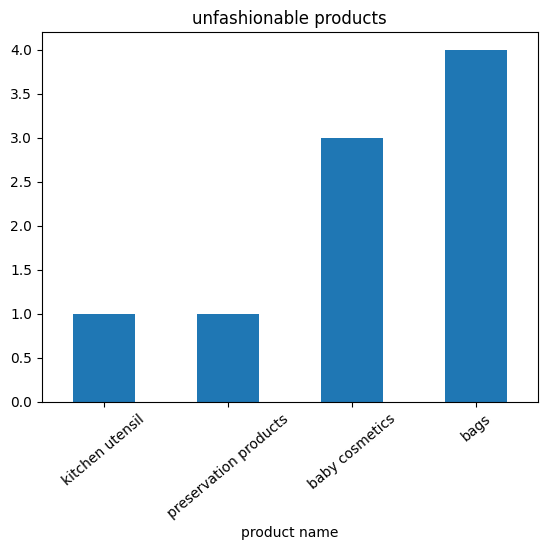

In [77]:
unfashionable_products = df.groupby('Product')['Product'].count().sort_values(ascending=True)

unfashionable_products[0:4].plot.bar(rot=40, title='unfashionable products', xlabel='product name');

## Number of Customer Baskets

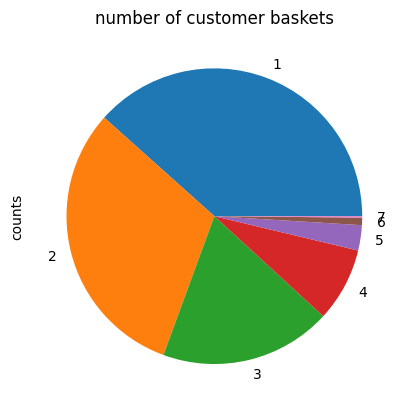

In [48]:
data_2020_year = df[df['Date'].dt.year == 2020]
data_2020_year_without_duplicate = data_2020_year.drop_duplicates(subset = ['Customer Id', 'Date'],keep = 'first')
number_of_customer_baskets_2020_year = data_2020_year_without_duplicate.groupby('Customer Id')['Customer Id'].count().reset_index(name='counts')

number_of_customer_baskets_2020_year.groupby(['counts'])['counts'].count().plot.pie(title='number of customer baskets');

## Daily Number of Sales

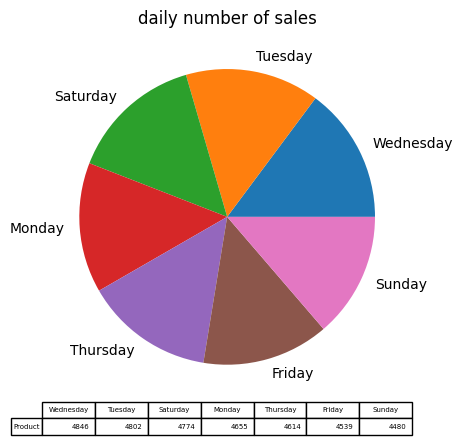

In [49]:
group_by_weekday = df.groupby(df['Date'].dt.day_name())['Product'].count().sort_values(ascending=False)
group_by_weekday.plot(kind='pie', title='daily number of sales', table=True, ylabel='');

In [50]:
df['InvoiceNo'] = df['Customer Id'].str.cat(df['Date'].astype(str), sep="-")
basket = df.drop(columns=['Date', 'Customer Id'])
basket['Quantity'] = 1
basket = pd.pivot_table(data=basket,index='InvoiceNo',columns='Product',values='Quantity', aggfunc='sum',fill_value=0)

In [51]:
from mlxtend.frequent_patterns import apriori

## Supports

<Axes: title={'center': 'most supported products'}, xlabel='itemsets'>

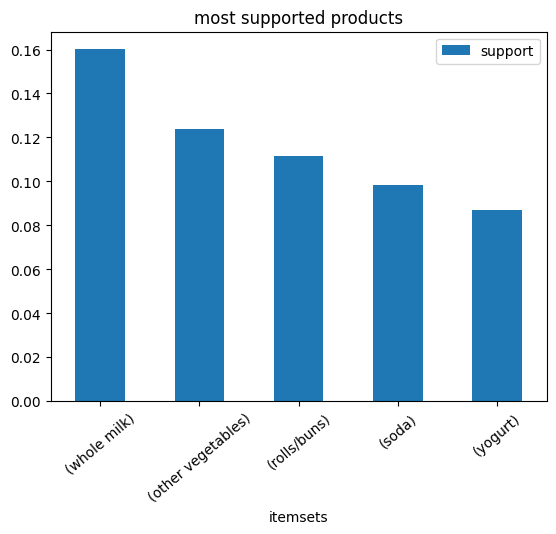

In [73]:
#call apriori function and pass minimum support here we are passing 1%. means 1 times in total number of transaction that item was present.
frequent_itemsets = apriori(basket.astype(bool), min_support=0.01, use_colnames=True)
frequent_itemsets.sort_values(by=['support'], ascending=False, inplace=True)
frequent_itemsets[0:5].plot.bar(x='itemsets', title='most supported products', rot=40, y='support')

# Confidence

In [58]:
from mlxtend.frequent_patterns import association_rules


rules_mlxtend = association_rules(frequent_itemsets, metric='conviction').sort_values(by=['confidence'], ascending=False)
rules_mlxtend.reset_index().head()

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,8,(yogurt),(whole milk),0.087101,0.160171,0.011320,0.129961,0.811391,-0.002631,0.965278,-0.202953
1,4,(rolls/buns),(whole milk),0.111571,0.160171,0.014167,0.126974,0.792744,-0.003704,0.961976,-0.227366
2,2,(other vegetables),(whole milk),0.123839,0.160171,0.015048,0.121511,0.758632,-0.004788,0.955992,-0.266396
3,6,(soda),(whole milk),0.098488,0.160171,0.011794,0.119752,0.747653,-0.003981,0.954083,-0.272405
4,0,(rolls/buns),(other vegetables),0.111571,0.123839,0.010710,0.095990,0.775120,-0.003107,0.969194,-0.246169
